<a href="https://colab.research.google.com/github/khairooo/AutoML_classifier_for_Breast_cancer/blob/main/AutoML_CLassifier_for_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Description: AutoML with PyCaret for Breast Cancer Dataset
Objective: Develop an automated machine learning (AutoML) model using PyCaret to predict breast cancer diagnosis based on the Wisconsin Breast Cancer Dataset.

- Breast cancer is one of the most common cancers affecting women worldwide. Early detection and accurate diagnosis are crucial for effective treatment. Machine learning models can assist in predicting breast cancer diagnosis with high accuracy, aiding medical professionals in making informed decisions.

In [8]:
#! pip install pycaret pandas shap

In [9]:
import pandas as pd
from pycaret.classification import *
import matplotlib.pyplot as plt

ImportError: cannot import name '_format_load_msg' from 'joblib.memory' (c:\Users\khair\anaconda3\envs\bc\lib\site-packages\joblib\memory.py)

# Load Data

In [105]:
df = pd.read_csv('/content/data.csv')

In [106]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [108]:
missing_values = df.isnull().sum()
print(missing_values)

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

- Old Machine Learning method to remove missing values, and doing some sort of Data Preprocessing

In [109]:
# Remove the the column "Unnamed" because it contains only missing values which has no sense in our model
df = df.drop('Unnamed: 32', axis=1)


In [110]:
# Remove id column
df = df.drop('id', axis=1)

In general,It is a good idea to remove the id column before training the model. This column typically contains unique identifiers that don’t carry any predictive value. Keeping it might introduce noise and reduce your model’s accuracy.

In [111]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- Clear that the Unnamed column has been removed

# Nowadays with AutoML,
In PyCaret, the setup() function is crucial because it initializes your environment and prepares your dataset for modeling. Here’s a quick rundown of its role:

- Data Preparation: It handles missing values, transforms categorical variables, and applies feature scaling.

- Splits Data: Divides your data into training and test sets for evaluation.

- Sets Configuration: Configures various settings like the target variable, session ID, and transformation techniques.

- Displays Summary: Shows a summary of the configuration, making it easy to review and adjust settings before training models.

**Essentially**, setup() streamlines the data preprocessing steps, ensuring your dataset is ready for machine learning modeling

In [112]:
describe_option= setup(data=df, target='diagnosis')
#no categorical_features in this Dataset because All the data types floats or integers

,Description,Value
0,Session id,2435
1,Target,diagnosis
2,Target type,Binary
3,Target mapping,"B: 0, M: 1"
4,Original data shape,"(569, 31)"
5,Transformed data shape,"(569, 31)"
6,Transformed train set shape,"(398, 31)"
7,Transformed test set shape,"(171, 31)"
8,Numeric features,30
9,Preprocess,True


###Note:
- As We can see in the table above how the setup() function made even the train and test sets to  (398,32)(171,32) respectively

In [113]:
models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9674,0.9957,0.9674,0.9688,0.9671,0.9293,0.9313,0.4450
xgboost,Extreme Gradient Boosting,0.9673,0.9938,0.9673,0.9684,0.9673,0.9299,0.9311,0.1900
ada,Ada Boost Classifier,0.9623,0.9957,0.9623,0.9634,0.9621,0.9186,0.9201,0.1960
et,Extra Trees Classifier,0.9622,0.9936,0.9622,0.9637,0.9621,0.9186,0.9203,0.3200
rf,Random Forest Classifier,0.9598,0.9941,0.9598,0.9606,0.9596,0.9131,0.9144,0.5010
gbc,Gradient Boosting Classifier,0.9598,0.9927,0.9598,0.9620,0.9596,0.9134,0.9160,0.4170
ridge,Ridge Classifier,0.9597,0.9911,0.9597,0.9619,0.9592,0.9117,0.9150,0.0700
qda,Quadratic Discriminant Analysis,0.9573,0.9879,0.9573,0.9582,0.9573,0.9087,0.9096,0.0710
lda,Linear Discriminant Analysis,0.9547,0.9921,0.9547,0.9566,0.9542,0.9011,0.9041,0.0400
lr,Logistic Regression,0.9524,0.9920,0.9524,0.9533,0.9523,0.8979,0.8990,0.6530


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

- Depending on the sheet above We found out that **Extra Trees Classifier(et)** has the best accuracy and highest and Precise measures like Recall, Precision, F1 score and AUC

In [114]:
# Let's test the model
predict_model(models,df.tail())

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,prediction_label,prediction_score
564,21.559999,22.389999,142.000000,1479.000000,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,2027.000000,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M,M,0.9999
565,20.129999,28.250000,131.199997,1261.000000,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,1731.000000,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M,M,0.9999
566,16.600000,28.080000,108.300003,858.099976,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,1124.000000,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M,M,0.9999
567,20.600000,29.330000,140.100006,1265.000000,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,1821.000000,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M,M,1.0000
568,7.760000,24.540001,47.919998,181.000000,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,268.600006,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,B,B,0.9999


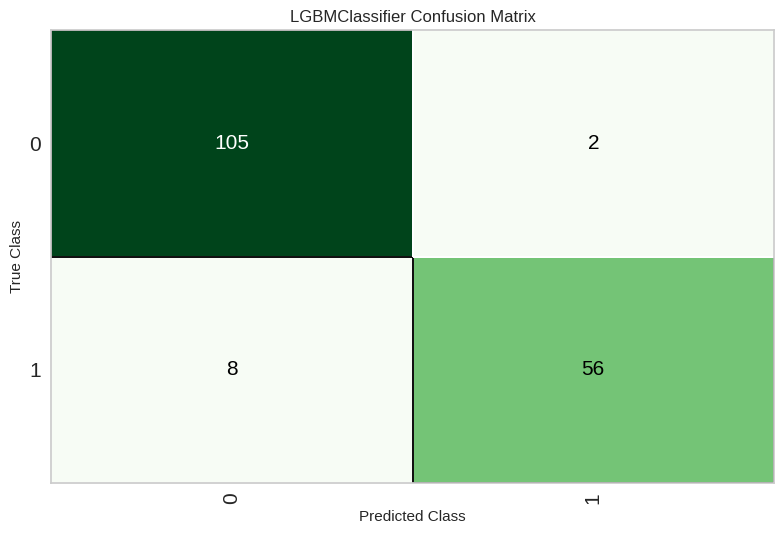

In [115]:
plot_model(models, plot = 'confusion_matrix')

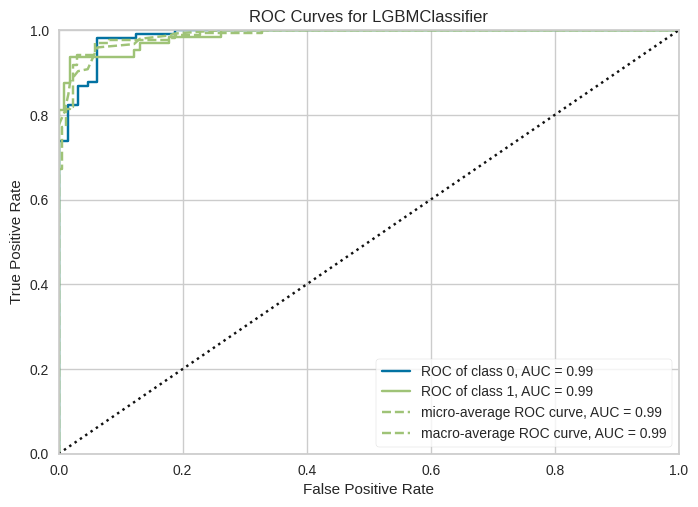

In [116]:
plot_model(models, plot = 'auc')

Interpreting the Area Under the Curve (AUC) is about understanding the performance of your classifier. AUC is a value between 0 and 1 that tells you how well your model distinguishes between the classes.

** Key Points:**
- AUC = 0.5: The model has no discrimination capability, similar to random guessing.

- AUC > 0.5 and < 0.7: The model has low discrimination capability.

- AUC >= 0.7 and < 0.8: The model has acceptable discrimination.

- AUC >= 0.8 and < 0.9: The model has excellent discrimination.

- AUC >= 0.9: The model has outstanding discrimination.

##### Visual Interpretation:
- ROC Curve: The closer the ROC curve is to the top left corner, the better the model.

 - Diagonal Line: Represents random guessing (AUC = 0.5).

- In essence, a higher AUC indicates a better performing model. So, if your model has an AUC of 0.85, it means your model is excellent at distinguishing between the classes.

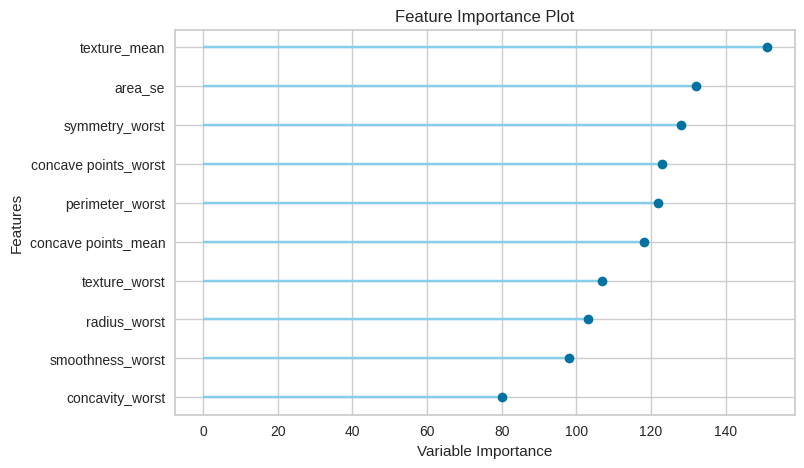

In [117]:
plot_model(models, plot='feature')


In [118]:
## Saving model
save_model(models, 'pycaret_breast_cancer')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['radius_mean', 'texture_mean',
                                              'perimeter_mean', 'area_mean',
                                              'smoothness_mean',
                                              'compactness_mean',
                                              'concavity_mean',
                                              'concave points_mean',
                                              'symmet...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1,

In [122]:
model = load_model('pycaret_breast_cancer')

Transformation Pipeline and Model Successfully Loaded


In [125]:
predict_model(model, data=df.tail(20))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,prediction_label,prediction_score
549,10.820000,24.209999,68.889999,361.600006,0.08192,0.06602,0.015480,0.00816,0.1976,0.06328,...,505.600006,0.12040,0.16330,0.06194,0.03264,0.3059,0.07626,B,B,0.9998
550,10.860000,21.480000,68.510002,360.500000,0.07431,0.04227,0.000000,0.00000,0.1661,0.05948,...,412.299988,0.10010,0.07348,0.00000,0.00000,0.2458,0.06592,B,B,0.9999
551,11.130000,22.440001,71.489998,378.399994,0.09566,0.08194,0.048240,0.02257,0.2030,0.06552,...,436.600006,0.10870,0.17820,0.15640,0.06413,0.3169,0.08032,B,B,0.9999
552,12.770000,29.430000,81.349998,507.899994,0.08276,0.04234,0.019970,0.01499,0.1539,0.05637,...,594.700012,0.12340,0.10640,0.08653,0.06498,0.2407,0.06484,B,B,0.9998
553,9.333000,21.940001,59.009998,264.000000,0.09240,0.05605,0.039960,0.01282,0.1692,0.06576,...,295.799988,0.11030,0.08298,0.07993,0.02564,0.2435,0.07393,B,B,0.9999
554,12.880000,28.920000,82.500000,514.299988,0.08123,0.05824,0.061950,0.02343,0.1566,0.05708,...,595.700012,0.12270,0.16200,0.24390,0.06493,0.2372,0.07242,B,B,0.9999
555,10.290000,27.610001,65.669998,321.399994,0.09030,0.07658,0.059990,0.02738,0.1593,0.06127,...,357.600006,0.13840,0.17100,0.20000,0.09127,0.2226,0.08283,B,B,0.9999
556,10.160000,19.590000,64.730003,311.700012,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,...,347.299988,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742,B,B,1.0000
557,9.423000,27.879999,59.259998,271.299988,0.08123,0.04971,0.000000,0.00000,0.1742,0.06059,...,330.600006,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969,B,B,0.9999
558,14.590000,22.680000,96.389999,657.099976,0.08473,0.13300,0.102900,0.03736,0.1454,0.06147,...,733.500000,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,B,B,0.9994
